In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
from scenedetect import detect, AdaptiveDetector
from sklearn.cluster import KMeans

In [189]:
avengers_path = "D:/iiitd/sem_1/ML/Project/VideoCompressionDataset/AvengersEndgme.mkv"

In [78]:
scene_list = detect(avengers_path, AdaptiveDetector())

In [28]:
for i, scene in enumerate(scene_list):
    print('Scene %2d: Start %s \t Frame %d \t End %s \t Frame %d' % 
        (i+1, scene[0].get_timecode(), scene[0].get_frames() + 1,
        scene[1].get_timecode(), scene[1].get_frames()))

Scene  1: Start 00:00:00.000 	 Frame 1 	 End 00:00:10.719 	 Frame 257
Scene  2: Start 00:00:10.719 	 Frame 258 	 End 00:00:17.100 	 Frame 410
Scene  3: Start 00:00:17.100 	 Frame 411 	 End 00:00:25.234 	 Frame 605
Scene  4: Start 00:00:25.234 	 Frame 606 	 End 00:01:04.856 	 Frame 1555
Scene  5: Start 00:01:04.856 	 Frame 1556 	 End 00:01:07.109 	 Frame 1609
Scene  6: Start 00:01:07.109 	 Frame 1610 	 End 00:01:10.862 	 Frame 1699
Scene  7: Start 00:01:10.862 	 Frame 1700 	 End 00:01:13.573 	 Frame 1764
Scene  8: Start 00:01:13.573 	 Frame 1765 	 End 00:01:18.620 	 Frame 1885
Scene  9: Start 00:01:18.620 	 Frame 1886 	 End 00:01:21.415 	 Frame 1952
Scene 10: Start 00:01:21.415 	 Frame 1953 	 End 00:01:22.874 	 Frame 1987
Scene 11: Start 00:01:22.874 	 Frame 1988 	 End 00:01:29.423 	 Frame 2144
Scene 12: Start 00:01:29.423 	 Frame 2145 	 End 00:01:40.642 	 Frame 2413
Scene 13: Start 00:01:40.642 	 Frame 2414 	 End 00:01:47.441 	 Frame 2576
Scene 14: Start 00:01:47.441 	 Frame 2577 	 End

In [5]:
avengers_frames_path = "D:/iiitd/sem_1/ML/Project/AvengerFrames"

In [15]:
frame_path = "D:/iiitd/sem_1/ML/Project/AvengerFrames/frame_0000.jpg"
frame = cv2.imread(frame_path)
if frame is None:
    print("Error: Unable to load the image.")
else:
    # frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_rgb = frame

In [16]:
frame_rgb.shape

(1608, 3840, 3)

In [17]:
rows = frame_rgb.shape[0]
cols = frame_rgb.shape[1]

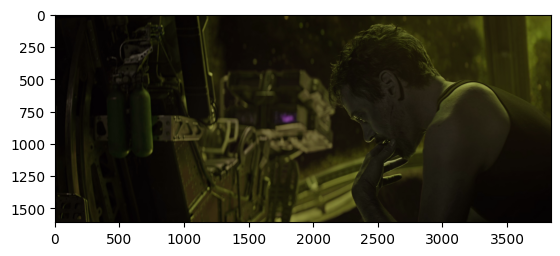

In [18]:
plt.imshow(frame_rgb)

In [10]:
image = frame_rgb.reshape(rows * cols, 3)
image.shape

(6174720, 3)

In [24]:
kmeans = KMeans(n_clusters=64, n_init=4, max_iter=200)
kmeans.fit(image)

KMeans(max_iter=200, n_clusters=64, n_init=4)

In [54]:
clusters = np.asarray(kmeans.cluster_centers_, dtype=np.uint8)
labels = np.asarray(kmeans.labels_, dtype=np.uint8)
labels = labels.reshape(rows, cols)
print(labels.shape)
np.save("D:/iiitd/sem_1/ML/Project/code_book.npy", clusters)
cv2.imwrite("D:/iiitd/sem_1/ML/Project/compressed.jpg", labels)
np.save("D:/iiitd/sem_1/ML/Project/compressed.npy", labels)


ValueError: cannot reshape array of size 1000 into shape (1608,3840)

In [53]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

from time import time
import cv2
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

n_colors = 64

# Load the Summer Palace photo
# china = load_sample_image("china.jpg")
# china = "D:/iiitd/sem_1/ML/Project/AvengerFrames/frame_0000.jpg"
frame_path = "D:/iiitd/sem_1/ML/Project/AvengerFrames/frame_0000.jpg"
china = cv2.imread(frame_path)
# china = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
# china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(labels.shape)
print(f"done in {time() - t0:0.3f}s.")


# codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
# print("Predicting color indices on the full image (random)")
# t0 = time()
# labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
# print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
# plt.figure(1)
# plt.clf()
# plt.axis("off")
# plt.title("Original image (96,615 colors)")
# plt.imshow(china)

# plt.figure(2)
# plt.clf()
# plt.axis("off")
# plt.title(f"Quantized image ({n_colors} colors, K-Means)")
# plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
x = recreate_image(kmeans.cluster_centers_, labels, w, h)
# x = x.astype(np.uint8)
cv2.imwrite("D:/iiitd/sem_1/ML/Project/compressed_1.jpg", x)
np.save("D:/iiitd/sem_1/ML/Project/compressed_1.npy", labels)
# plt.figure(3)
# plt.clf()
# plt.axis("off")
# plt.title(f"Quantized image ({n_colors} colors, Random)")
# plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

Fitting model on a small sub-sample of the data
done in 0.301s.
Predicting color indices on the full image (k-means)
(6174720,)
done in 0.417s.


In [23]:
frame_path = "D:/iiitd/sem_1/ML/Project/AvengerFrames/frame_0452.jpg"
frame = cv2.imread(frame_path)
# frame.shape
# x = frame.astype(np.uint8)
# cv2.imwrite("D:/iiitd/sem_1/ML/Project/1.jpg", x)

In [24]:
image = frame.reshape(frame.shape[0] * frame.shape[1], 3)
image.shape

(6174720, 3)

In [28]:
kmeans = KMeans(n_clusters=64, n_init='auto', max_iter=200)
kmeans.fit(image)

KMeans(max_iter=200, n_clusters=32, n_init='auto')

In [30]:
y = kmeans.labels_
y = np.asarray(y, dtype=np.int8)
y = y.reshape(frame.shape[0], frame.shape[1])
cv2.imwrite("D:/iiitd/sem_1/ML/Project/compressed_2.jpg", kmeans.cluster_centers_[y])
y

array([[23, 23, 26, ...,  6,  6,  6],
       [23, 23, 26, ...,  6,  6,  6],
       [23, 26, 26, ...,  6,  6,  6],
       ...,
       [ 7,  7,  7, ..., 26, 26, 26],
       [ 7,  7,  7, ..., 23, 26, 26],
       [ 7,  7,  7, ..., 23, 26, 26]], dtype=int8)

In [11]:
# for i in range(y.shape[0]):
#     k = 0
#     l = -1
#     for j in range(y.shape[1]):
#         if l == -1:
#             k = y[i][j]
#             l += 1
#         elif k != y[i][j]:
#             print(k, l, end = "")
#             l = 1
#             k = k = y[i][j]
#         else:
#             l += 1
#         # print(y[i][j], end = "")
#     print()

0 27356 412 1356 112 156 20 5156 612 126 350 430 1450 226 212 456 212 826 849 426 412 180 412 256 626 1212 456 1212 126 649 3126 1849 650 730 353 225 110 118 11 123 159 423 133 11 118 110 148 153 163 150 112 656 612 1426 1412 226 112 4126 1212 1226 649 226 549 236 4449 726 312 1226 249 16 316 530 516 130 196 216 43 119 141 118 155 223 333 11 118 110 425 248 153 716 130 4150 1630 1653 1016 130 250 149 126 112 20 3256 12412 126 249 116 13 147 124 155 123 151 121 162 228 331 58 131 128 162 14 120 159 11 147 148 153 130 1316 530 116 1660 216 630 453 125 110 118 11 133 113 151 320 458 159 123 155 11 118 224 210 347 3825 147 325 548 325 448 1453 1060 216 230 260 630 1050 1326 150 426 449 226 1212 1826 1449 450 2426 4449 226 249 226 149 1750 530 246 330 116 530 246 106 246 36 2446 16 846 216 146 86 446 46 830 12550 130 4316 130 616 1460 446 260 83 148 125 147 124 118 152 259 158 120 14 139 162 74 221 254 213 152 11 118 124 110 225 248 453 53 1848 153 3360 1416 2030 216 230 6116 353 448 725 13

In [147]:
a = [i%256 for i in range(6174720)]
a = np.array(a).reshape(1608, 3840)
cv2.imwrite("D:/iiitd/sem_1/ML/Project/compressed_3.jpg", a)

True

In [36]:
frame_path = "D:/iiitd/sem_1/ML/Project/AvengerFrames/frame_0000.jpg"

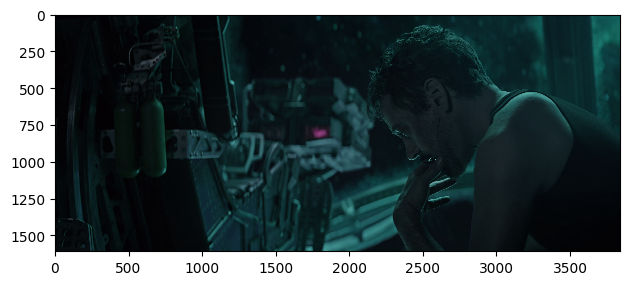

In [47]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np 

image = io.imread(frame_path)
io.imshow(image)

In [48]:
image.shape

(1608, 3840, 3)

In [49]:
rows = image.shape[0]
cols = image.shape[1]

In [51]:
new_image = image.reshape(rows * cols, 3)
new_image.shape

(6174720, 3)

In [52]:
kmeans = KMeans(n_clusters=25, n_init=1, max_iter=200, verbose=1)
kmeans.fit(new_image)

Initialization complete
Iteration 0, inertia 150929770.0.
Iteration 1, inertia 122532135.54372817.
Iteration 2, inertia 118726951.14624348.
Iteration 3, inertia 117517622.3840281.
Iteration 4, inertia 116703713.01121208.
Iteration 5, inertia 116342598.25073488.
Iteration 6, inertia 116084667.001551.
Iteration 7, inertia 115908634.57628429.
Iteration 8, inertia 115747423.4758521.
Iteration 9, inertia 115564197.85735668.
Iteration 10, inertia 115399389.38868353.
Iteration 11, inertia 115226706.77604933.
Iteration 12, inertia 115080736.25567769.
Iteration 13, inertia 114907312.54714268.
Iteration 14, inertia 114748251.19548252.
Iteration 15, inertia 114646551.90580279.
Iteration 16, inertia 114566753.29009704.
Iteration 17, inertia 114473378.66606139.
Iteration 18, inertia 114397894.64358577.
Iteration 19, inertia 114300123.40507095.
Iteration 20, inertia 114240308.66390388.
Iteration 21, inertia 114198001.89385638.
Iteration 22, inertia 114172608.14894661.
Iteration 23, inertia 114158732

KMeans(max_iter=200, n_clusters=25, n_init=1, verbose=1)

In [53]:
# import zlib
clusters = np.asarray(kmeans.cluster_centers_, dtype=np.uint8)
labels = np.asarray(kmeans.labels_, dtype=np.uint8)
labels = labels.reshape(rows, cols)
# x = labels.tobytes()
# compressed_x = zlib.compress(x)
# 
# with open('compressed_x.zlib', 'wb') as f:
    # f.write(compressed_x)

In [54]:
np.save("D:/iiitd/sem_1/ML/Project/code_book.npy", clusters)
io.imsave("D:/iiitd/sem_1/ML/Project/compressed_frame.jpg", labels)
io.imsave("D:/iiitd/sem_1/ML/Project/decompressed_frame.jpg", clusters[labels])
np.save("D:/iiitd/sem_1/ML/Project/compressed_frame.npy", labels)

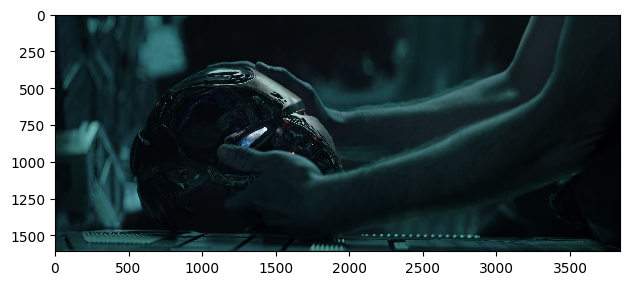

In [69]:
new_frame = "D:/iiitd/sem_1/ML/Project/AvengerFrames/frame_0432.jpg"
image = io.imread(new_frame)
io.imshow(image)

In [70]:
r, c, d = image.shape
new_image = image.reshape(r * c, 3)
new_image.shape
x = kmeans.predict(new_image)
x = np.asarray(x, dtype=np.uint8)
x = x.reshape(r, c)

In [71]:
# np.save("D:/iiitd/sem_1/ML/Project/code_book.npy", clusters)
io.imsave("D:/iiitd/sem_1/ML/Project/compressed_frame1.jpg", x)
io.imsave("D:/iiitd/sem_1/ML/Project/decompressed_frame1.jpg", clusters[x])
# np.save("D:/iiitd/sem_1/ML/Project/compressed_frame1.npy", x)

In [121]:
import h5py
h5f = h5py.File('data.h5', 'w')
h5f.create_dataset('dataset_1', data=labels, compression="gzip", dtype='int8')
h5f.create_dataset('dataset_2', data=labels, compression="gzip", dtype='int8')
h5f.create_dataset('dataset_3', data=labels, compression="gzip", dtype='int8')
h5f.close()


In [117]:
labels.nbytes

6174720

In [132]:
arr = []
for (i, j) in scene_list:
    arr.append(i.get_frames() + 1)

len(arr)
# print(arr)

141

In [133]:
import os
from skimage import io
from sklearn.cluster import KMeans

def get_frame(image):
    r, c, d = image.shape
    image = image.reshape(r * c, d)
    
    kmeans = KMeans(n_clusters=25, n_init=1, max_iter=200)
    kmeans.fit(image)

    clusters = np.asarray(kmeans.cluster_centers_, dtype=np.uint8)
    labels = np.asarray(kmeans.labels_, dtype=np.uint8)
    labels = labels.reshape(r, c)
    
    return clusters, labels


In [134]:
# arr = [1, 30, 60, , 160, 200, 240, 280]
k = 0
bw_path_clusters = "D:/iiitd/sem_1/ML/Project/bw_data/clusters"
bw_path_labels = "D:/iiitd/sem_1/ML/Project/bw_data/labels"
os.makedirs(bw_path_clusters, exist_ok=True)
os.makedirs(bw_path_labels, exist_ok=True)

directory_path = "D:/iiitd/sem_1/ML/Project/AvengerFrames"
x = os.listdir(directory_path)
x.sort()
for i, j in enumerate(x):
    if(k >= len(arr)):
        break
    if i + 1 == arr[k]:
        image = io.imread(os.path.join(directory_path, j))
        clusters, labels = get_frame(image)
        np.save(os.path.join(bw_path_clusters, f"{arr[k]}.npy"), clusters)
        io.imsave(os.path.join(bw_path_labels, f"{arr[k]}.png"), labels)
        k += 1

In [179]:
clusters_path = "D:/iiitd/sem_1/ML/Project/bw_data/clusters"
labels_path = "D:/iiitd/sem_1/ML/Project/bw_data/labels"

# x = os.listdir(clusters_path)
# y = os.listdir(labels_path)
# x.sort()
# y.sort()
# print(x)
# print(y)

output_path = "D:/iiitd/sem_1/ML/Project/decompressed_video.mp4"

# img = cv2.imread(os.path.join(labels_path, y[0]))
# height, width = img.shape
r = 1608
c = 3840

fps = 24
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(output_path, fourcc, fps, (c, r))

arr1 = arr.copy()
# print(arr)
arr1.append(14228)
# print(arr1)
for i in range(len(arr1) - 1):
    x_path = os.path.join(clusters_path, f"{arr1[i]}.npy")
    y_path = os.path.join(labels_path, f"{arr1[i]}.png")
    clusters = np.load(x_path)
    labels = io.imread(y_path)
    img = clusters[labels]
    # io.imshow(img)
    # print(img.shape)
    for j in range(arr1[i], arr1[i + 1]):
        video.write(img)
# (1608, 3840, 3)
video.release()

In [180]:
from moviepy.editor import VideoFileClip

def extract_audio(input_video, output_audio):
    video_clip = VideoFileClip(input_video)
    audio_clip = video_clip.audio
    audio_clip.write_audiofile(output_audio)

# Example usage
input_video_file = "D:/iiitd/sem_1/ML/Project/VideoCompressionDataset/AvengersEndgme.mkv"
output_audio_file = "avenger_audio.mp3"
extract_audio(input_video_file, output_audio_file)


MoviePy - Writing audio in avenger_audio.mp3


MoviePy - Done.


In [181]:
import numpy as np
from sklearn.decomposition import PCA
import librosa

# Load audio data
file_path = "D:\iiitd\sem_1\ML\Project/avenger_audio.mp3"
audio_data, sr = librosa.load(file_path, sr=None)

# Reshape the audio data into a 2D array (features x time steps)
audio_data_2d = audio_data.reshape(1, -1)

# Choose the number of principal components (compression size)
compression_size = 0.3  # Adjust based on the number of features
pca = PCA(n_components=compression_size)

# Fit the PCA model on the audio data
compressed_representation1 = pca.fit_transform(audio_data_2d)

# Save the compressed representation and metadata
np.save("compressed_audio.npy", compressed_representation1)

In [183]:
import soundfile as sf
# Decompress audio
compressed_audio = np.load("D:\iiitd\sem_1\ML\Project\compressed_audio.npy")
reconstructed_audio_2d = pca.inverse_transform(compressed_audio)
reconstructed_audio = reconstructed_audio_2d.flatten()

# Save the reconstructed audio
sf.write("reconstructed_avenger_audio.mp3", reconstructed_audio, sr)


In [188]:
import moviepy.editor as mpe

def merge_audio_video(video_path, audio_path, output_path):
    # Load the video clip
    video_clip = mpe.VideoFileClip(video_path)

    # Load the audio clip
    audio_clip = mpe.AudioFileClip(audio_path)

    # Set the video clip's audio to the loaded audio clip
    video_clip = video_clip.set_audio(audio_clip)

    # Write the result to a new video filevideo_clip.write_videofile(output_path, codec="libx264", audio_codec="aac", fps=24)  # Adjust the fps value as needed
    video_clip.write_videofile(output_path, codec="libx264", audio_codec="aac", fps=24, ffmpeg_params=["-pix_fmt", "yuv420p"])



audio_path = "D:\iiitd\sem_1\ML\Project/reconstructed_avenger_audio.mp3"
output_path = "output_video_with_audio.mp4"
video_path = "D:\iiitd\sem_1\ML\Project\decompressed_video.mp4"
merge_audio_video(video_path, audio_path, output_path)

Moviepy - Building video output_video_with_audio.mp4.
MoviePy - Writing audio in output_video_with_audioTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_video_with_audio.mp4



TypeError: must be real number, not NoneType